In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np

In [2]:
trainPath = '/Users/kaikaneshina/Documents/MATH178/project_data/train_set.csv'

In [7]:
allData = pd.read_csv(trainPath)

In [8]:
activities = allData.activity.unique()

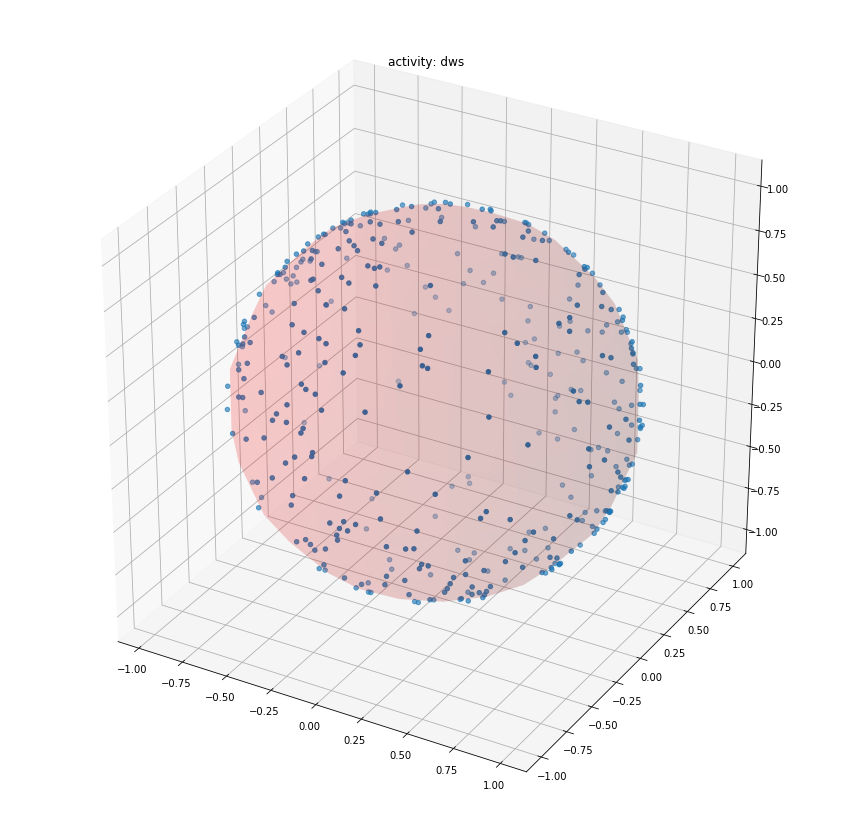

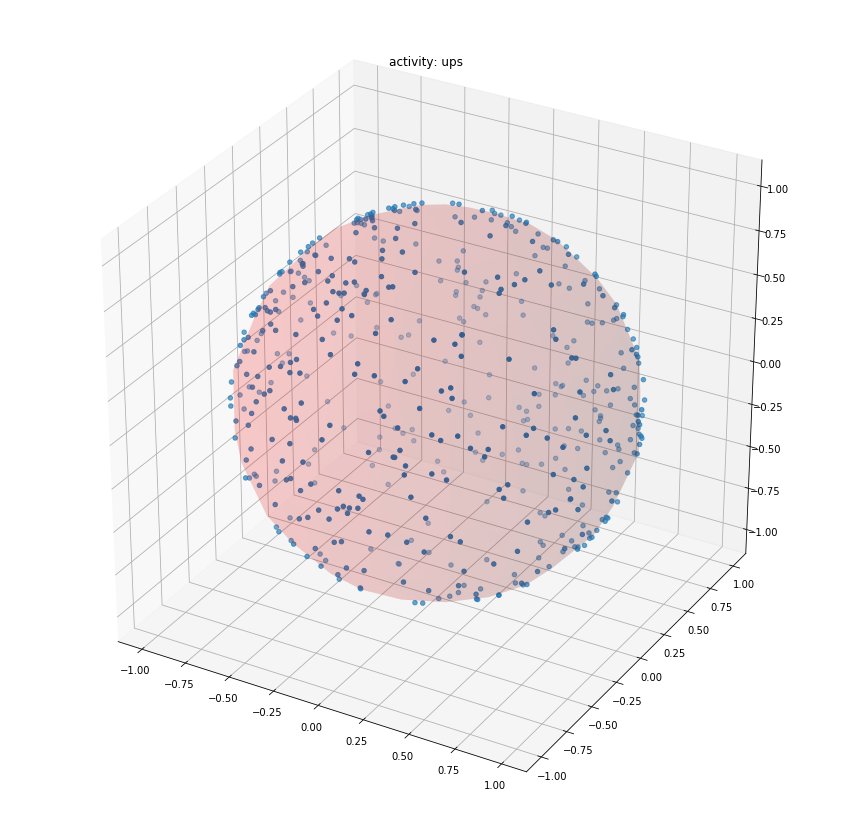

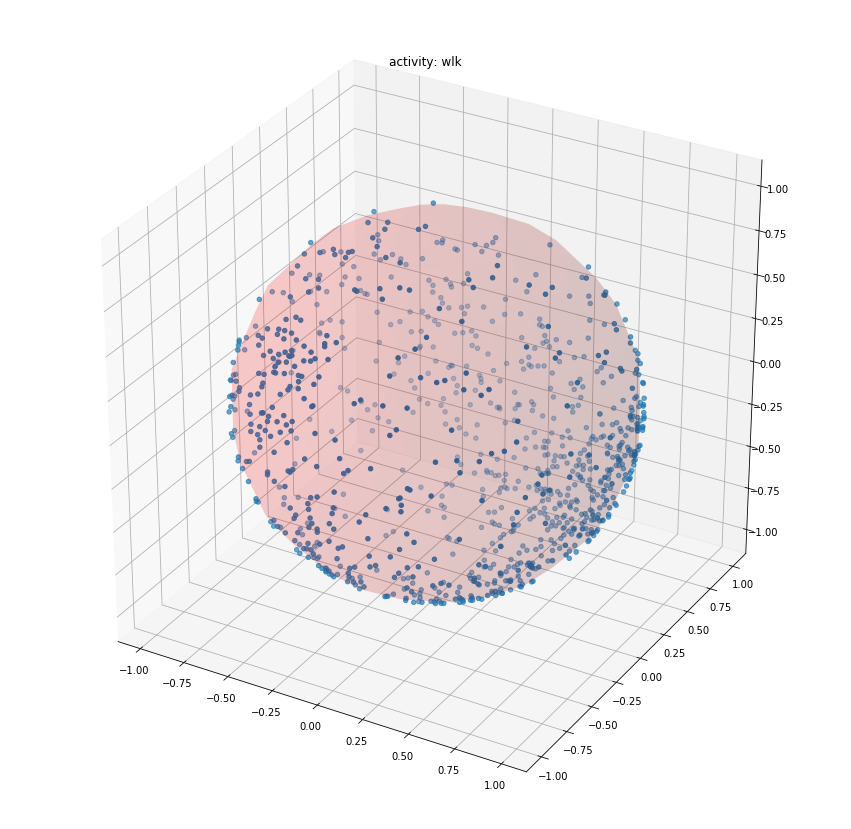

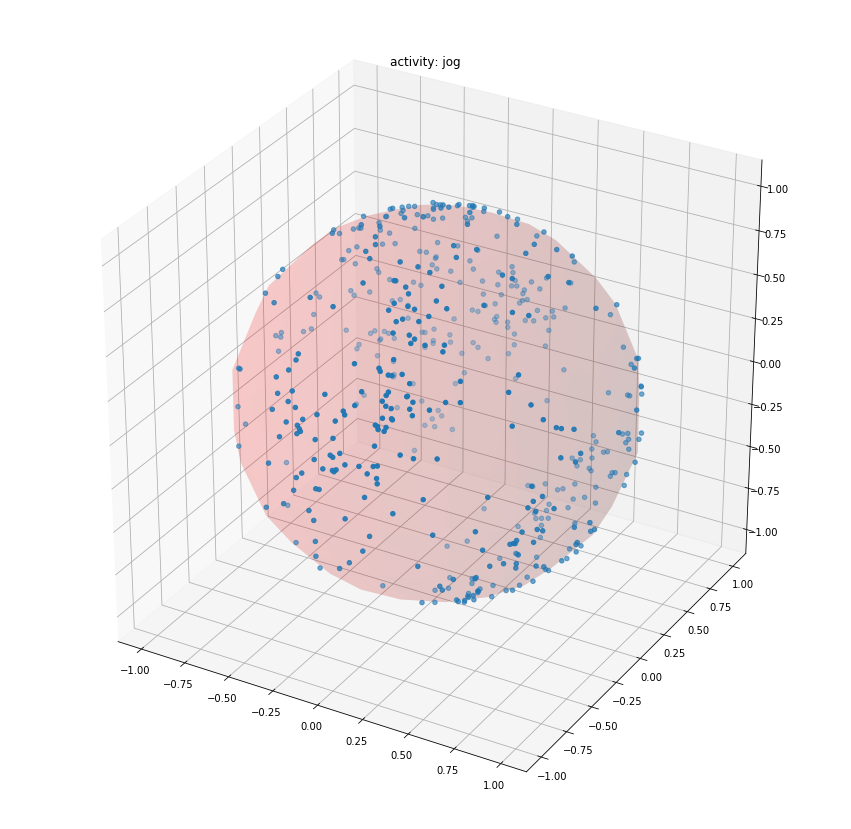

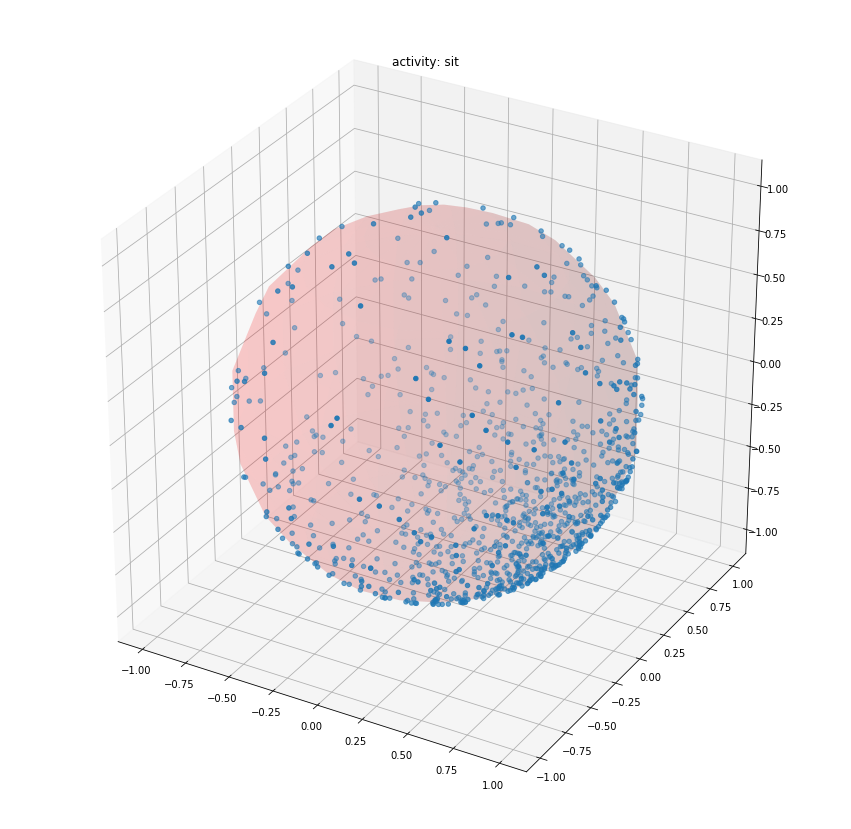

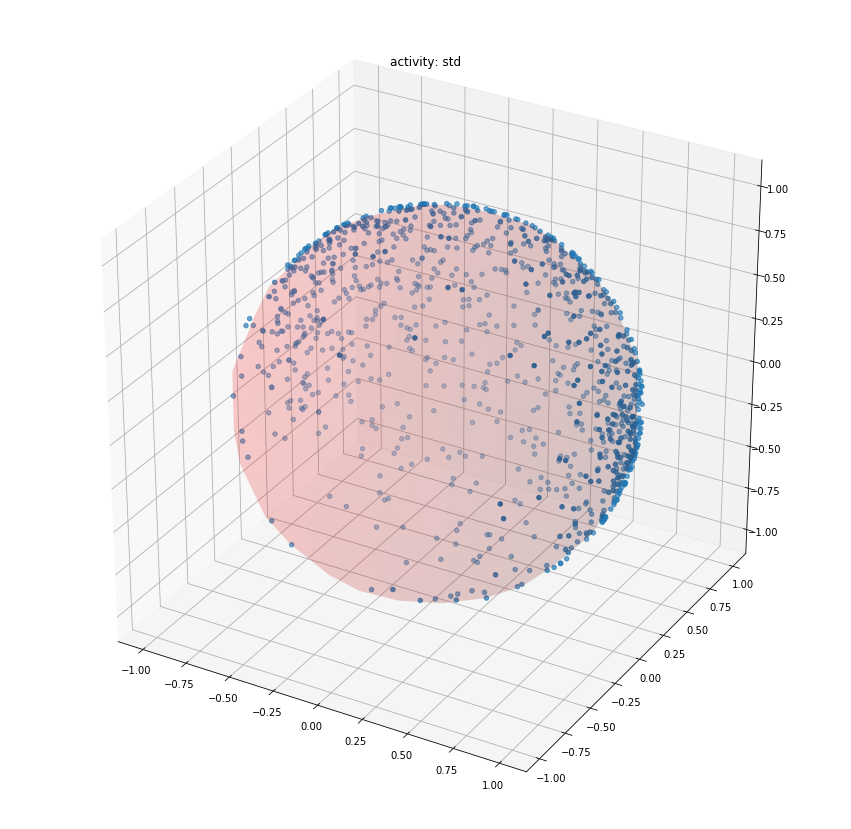

In [9]:
data = allData[allData['user']==1]
for act in activities:
    df = data[data['activity'] == act]
    if df.shape[0] > 0:
        vector = df[['a_x','a_y','a_z']]
        theta = vector.apply(lambda x: x/np.linalg.norm(x), axis = 1)
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(111,  projection='3d')

        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_surface(x, y, z, color="r", alpha = .1)

        u = theta['a_x'].values[::10]
        v = theta['a_y'].values[::10]
        w = theta['a_z'].values[::10]

        ax.scatter(u, v, w)
        ax.set_title('activity: ' + act)